In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/ecommerce_delivery_prediction_50k_realistic.csv")
df

,order_id,customer_id,product_id,product_category,city,gps_latitude,gps_longitude,distance_km,order_date,arrival_date,delivery_days,shipping_mode,payment_mode,product_weight_kg,price,festival_season,weather_delay
0,500000,6608,71615,Beauty,Mumbai,19.056179,72.901280,179,2024-08-19,2024-08-23,4,Express,NetBanking,5.76,40236.09,0,0
1,500001,1953,68564,Electronics,Mumbai,19.138003,72.911109,138,2024-08-03,2024-08-05,2,Express,UPI,4.35,89511.53,0,0
2,500002,2094,59689,Electronics,Delhi,28.662948,77.039029,289,2024-10-14,2024-10-21,7,Standard,COD,6.65,92780.61,0,0
3,500003,2488,20742,Grocery,Chennai,13.076063,80.265407,184,2024-05-27,2024-05-30,3,Express,NetBanking,2.68,62267.64,0,0
4,500004,3279,63459,Beauty,Kochi,9.852487,76.190559,442,2024-10-26,2024-10-31,5,Express,UPI,7.24,90956.09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,549995,1491,17358,Fashion,Mumbai,19.068289,72.944235,146,2024-10-02,2024-10-06,4,Express,UPI,7.50,12318.12,1,0
49996,549996,6499,12467,Fashion,Kochi,9.958956,76.342878,399,2024-02-05,2024-02-09,4,Same-Day,UPI,7.67,89443.25,0,0
49997,549997,1297,29560,Fashion,Chennai,13.080006,80.260528,248,2024-02-05,2024-02-13,8,Standard,Card,6.30,43611.69,1,0
49998,549998,1001,81269,Home,Kochi,9.887247,76.311732,398,2024-03-18,2024-03-22,4,Express,UPI,1.85,94974.45,0,0


In [ ]:
df.head()

,order_id,customer_id,product_id,product_category,city,gps_latitude,gps_longitude,distance_km,order_date,arrival_date,delivery_days,shipping_mode,payment_mode,product_weight_kg,price,festival_season,weather_delay
0,500000,6608,71615,Beauty,Mumbai,19.056179,72.901280,179,2024-08-19,2024-08-23,4,Express,NetBanking,5.76,40236.09,0,0
1,500001,1953,68564,Electronics,Mumbai,19.138003,72.911109,138,2024-08-03,2024-08-05,2,Express,UPI,4.35,89511.53,0,0
2,500002,2094,59689,Electronics,Delhi,28.662948,77.039029,289,2024-10-14,2024-10-21,7,Standard,COD,6.65,92780.61,0,0
3,500003,2488,20742,Grocery,Chennai,13.076063,80.265407,184,2024-05-27,2024-05-30,3,Express,NetBanking,2.68,62267.64,0,0
4,500004,3279,63459,Beauty,Kochi,9.852487,76.190559,442,2024-10-26,2024-10-31,5,Express,UPI,7.24,90956.09,0,0


In [ ]:
df.tail()

,order_id,customer_id,product_id,product_category,city,gps_latitude,gps_longitude,distance_km,order_date,arrival_date,delivery_days,shipping_mode,payment_mode,product_weight_kg,price,festival_season,weather_delay
49995,549995,1491,17358,Fashion,Mumbai,19.068289,72.944235,146,2024-10-02,2024-10-06,4,Express,UPI,7.50,12318.12,1,0
49996,549996,6499,12467,Fashion,Kochi,9.958956,76.342878,399,2024-02-05,2024-02-09,4,Same-Day,UPI,7.67,89443.25,0,0
49997,549997,1297,29560,Fashion,Chennai,13.080006,80.260528,248,2024-02-05,2024-02-13,8,Standard,Card,6.30,43611.69,1,0
49998,549998,1001,81269,Home,Kochi,9.887247,76.311732,398,2024-03-18,2024-03-22,4,Express,UPI,1.85,94974.45,0,0
49999,549999,3858,52300,Home,Delhi,28.727944,77.035503,352,2024-01-23,2024-01-28,5,Express,COD,5.27,2178.33,0,0


In [ ]:
print("Number of columns:",df.shape[1])
print("Number of rows:",df.shape[0])

Number of columns: 17
Number of rows: 50000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           50000 non-null  int64  
 1   customer_id        50000 non-null  int64  
 2   product_id         50000 non-null  int64  
 3   product_category   50000 non-null  object 
 4   city               50000 non-null  object 
 5   gps_latitude       50000 non-null  float64
 6   gps_longitude      50000 non-null  float64
 7   distance_km        50000 non-null  int64  
 8   order_date         50000 non-null  object 
 9   arrival_date       50000 non-null  object 
 10  delivery_days      50000 non-null  int64  
 11  shipping_mode      50000 non-null  object 
 12  payment_mode       50000 non-null  object 
 13  product_weight_kg  50000 non-null  float64
 14  price              50000 non-null  float64
 15  festival_season    50000 non-null  int64  
 16  weather_delay      500

In [ ]:
df.dtypes

,0
order_id,int64
customer_id,int64
product_id,int64
product_category,object
city,object
gps_latitude,float64
gps_longitude,float64
distance_km,int64
order_date,object
arrival_date,object


In [ ]:
df.columns

Index(['order_id', 'customer_id', 'product_id', 'product_category', 'city',
       'gps_latitude', 'gps_longitude', 'distance_km', 'order_date',
       'arrival_date', 'delivery_days', 'shipping_mode', 'payment_mode',
       'product_weight_kg', 'price', 'festival_season', 'weather_delay'],
      dtype='object')

In [ ]:
df.describe()

,order_id,customer_id,product_id,gps_latitude,gps_longitude,distance_km,delivery_days,product_weight_kg,price,festival_season,weather_delay
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,524999.500000,4994.048620,55033.923740,16.849024,77.100996,222.205400,5.296820,4.107225,47577.976520,0.150100,0.100220
std,14433.901067,2314.857468,25989.435625,6.091378,2.268180,113.230349,1.937966,2.249901,27417.406832,0.357173,0.300296
min,500000.000000,1000.000000,10000.000000,9.851219,72.797727,50.000000,1.000000,0.200000,152.890000,0.000000,0.000000
25%,512499.750000,2987.000000,32384.500000,12.972828,76.265826,131.000000,4.000000,2.170000,23866.852500,0.000000,0.000000
50%,524999.500000,4987.000000,55374.500000,13.159994,77.515940,189.000000,6.000000,4.100000,47375.425000,0.000000,0.000000
75%,537499.250000,7008.000000,77457.250000,19.076676,78.488430,314.000000,7.000000,6.060000,71355.212500,0.000000,0.000000
max,549999.000000,8999.000000,99998.000000,28.784087,80.350685,459.000000,11.000000,8.000000,94999.570000,1.000000,1.000000


In [ ]:
df['delivery_days'].describe()

,delivery_days
count,50000.000000
mean,5.296820
std,1.937966
min,1.000000
25%,4.000000
50%,6.000000
75%,7.000000
max,11.000000


In [ ]:
df.isna()

,order_id,customer_id,product_id,product_category,city,gps_latitude,gps_longitude,distance_km,order_date,arrival_date,delivery_days,shipping_mode,payment_mode,product_weight_kg,price,festival_season,weather_delay
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
order_id,0
customer_id,0
product_id,0
product_category,0
city,0
gps_latitude,0
gps_longitude,0
distance_km,0
order_date,0
arrival_date,0


In [ ]:
df['delivery_days'].value_counts()

,count
delivery_days,
6,10305
7,9607
5,7376
3,6427
4,5489
8,4758
2,4043
9,1054
1,823


In [ ]:
df['delivery_days'].unique()

array([ 4,  2,  7,  3,  5,  6,  1,  8, 10,  9, 11])

Target distribution, delivery days

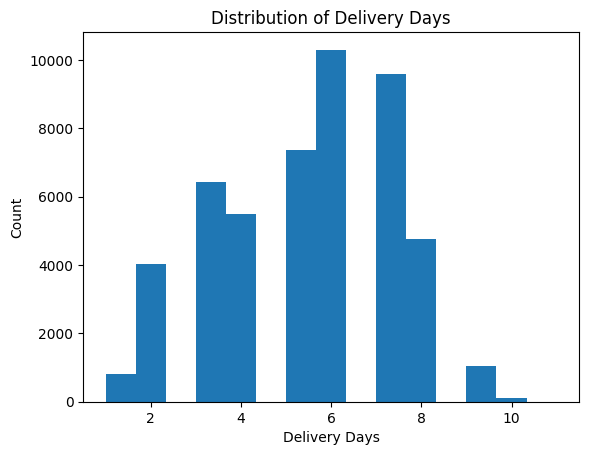

In [ ]:
plt.figure()
plt.hist(df["delivery_days"], bins=15)
plt.xlabel("Delivery Days")
plt.ylabel("Count")
plt.title("Distribution of Delivery Days")
plt.show()


Categorical vs target analysis

In [ ]:
df.groupby("shipping_mode")["delivery_days"].mean().sort_values()


,delivery_days
shipping_mode,
Same-Day,2.585188
Express,3.589534
Standard,6.593664


City impact

In [ ]:
df.groupby("city")["delivery_days"].mean().sort_values()


,delivery_days
city,
Bangalore,4.327311
Mumbai,4.684450
Hyderabad,5.003300
Chennai,5.360090
Delhi,5.980649
Kochi,6.448009


Shipping mode vs delivery time

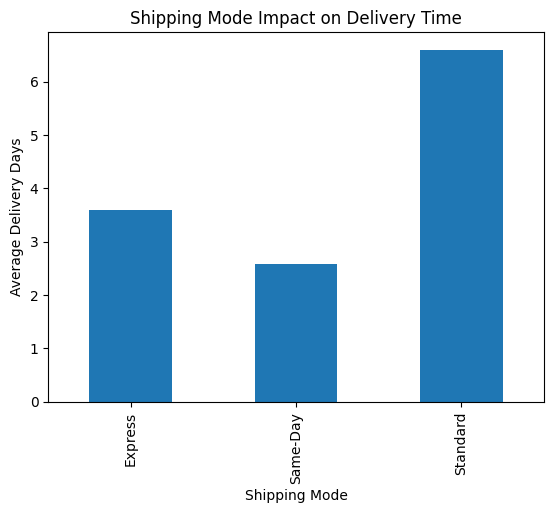

In [ ]:
shipping_avg = df.groupby("shipping_mode")["delivery_days"].mean()

plt.figure()
shipping_avg.plot(kind="bar")
plt.xlabel("Shipping Mode")
plt.ylabel("Average Delivery Days")
plt.title("Shipping Mode Impact on Delivery Time")
plt.show()


Distance vs delivery days

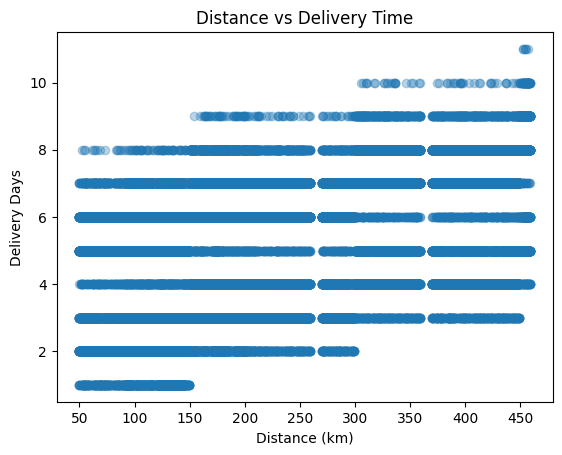

In [ ]:
plt.figure()
plt.scatter(df["distance_km"], df["delivery_days"], alpha=0.3)
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Days")
plt.title("Distance vs Delivery Time")
plt.show()


City vs average delivery time

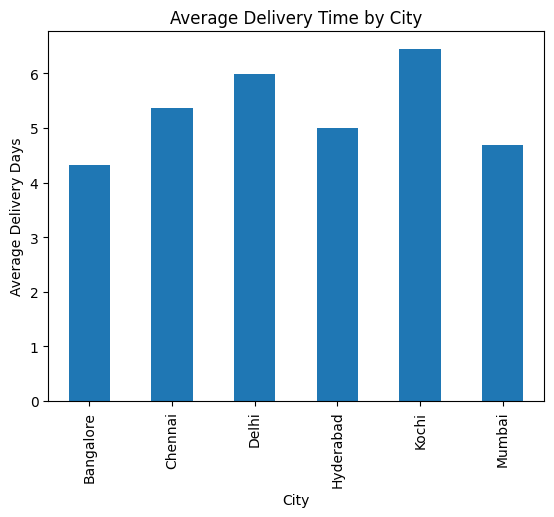

In [ ]:
city_avg = df.groupby("city")["delivery_days"].mean()

plt.figure()
city_avg.plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Average Delivery Days")
plt.title("Average Delivery Time by City")
plt.show()


Festival season impact

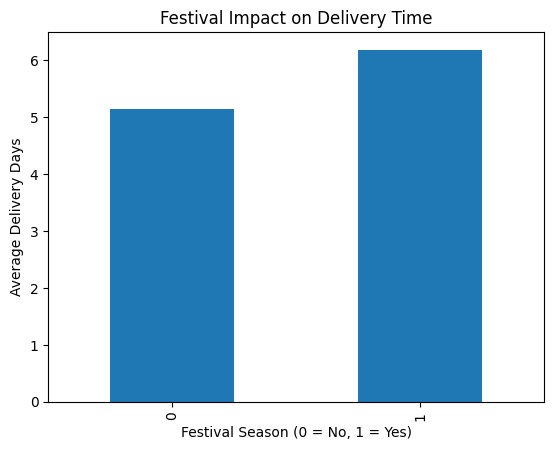

In [ ]:
festival_avg = df.groupby("festival_season")["delivery_days"].mean()

plt.figure()
festival_avg.plot(kind="bar")
plt.xlabel("Festival Season (0 = No, 1 = Yes)")
plt.ylabel("Average Delivery Days")
plt.title("Festival Impact on Delivery Time")
plt.show()


Product weight vs delivery time (binned)

/tmp/ipython-input-4050716863.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_avg = df.groupby(weight_bins)["delivery_days"].mean()


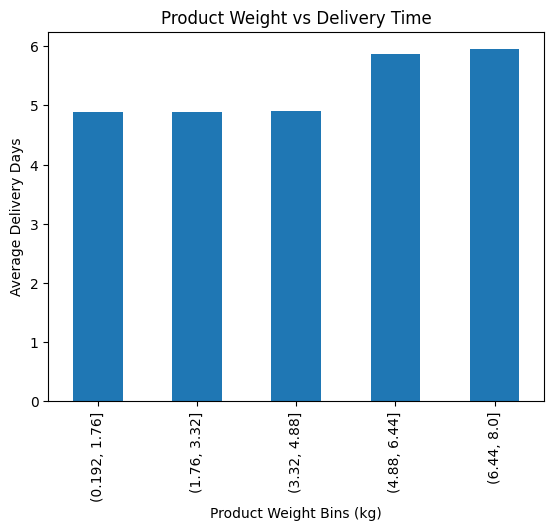

In [ ]:
weight_bins = pd.cut(df["product_weight_kg"], bins=5)
weight_avg = df.groupby(weight_bins)["delivery_days"].mean()

plt.figure()
weight_avg.plot(kind="bar")
plt.xlabel("Product Weight Bins (kg)")
plt.ylabel("Average Delivery Days")
plt.title("Product Weight vs Delivery Time")
plt.show()


Price vs delivery time (sanity check)

/tmp/ipython-input-3950797758.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_avg = df.groupby(price_bins)["delivery_days"].mean()


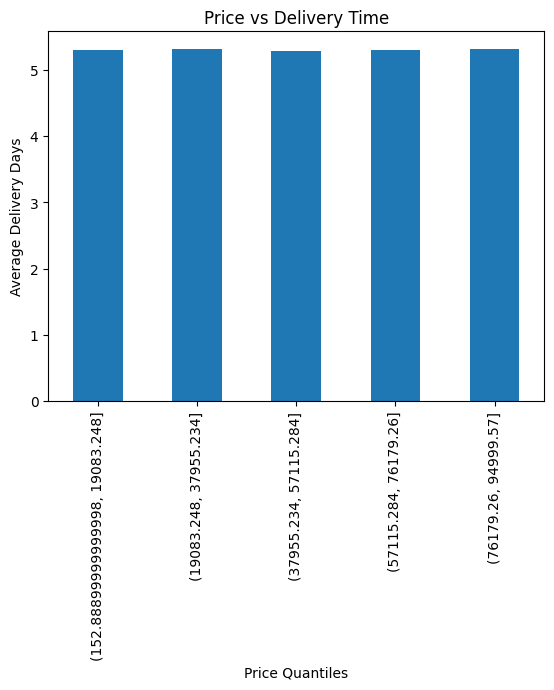

In [ ]:
price_bins = pd.qcut(df["price"], q=5)
price_avg = df.groupby(price_bins)["delivery_days"].mean()

plt.figure()
price_avg.plot(kind="bar")
plt.xlabel("Price Quantiles")
plt.ylabel("Average Delivery Days")
plt.title("Price vs Delivery Time")
plt.show()


In [ ]:
df=df.drop(columns=['arrival_date','order_id','customer_id','product_id','payment_mode'])


In [ ]:
df

,product_category,city,gps_latitude,gps_longitude,distance_km,order_date,delivery_days,shipping_mode,product_weight_kg,price,festival_season,weather_delay
0,Beauty,Mumbai,19.056179,72.901280,179,2024-08-19,4,Express,5.76,40236.09,0,0
1,Electronics,Mumbai,19.138003,72.911109,138,2024-08-03,2,Express,4.35,89511.53,0,0
2,Electronics,Delhi,28.662948,77.039029,289,2024-10-14,7,Standard,6.65,92780.61,0,0
3,Grocery,Chennai,13.076063,80.265407,184,2024-05-27,3,Express,2.68,62267.64,0,0
4,Beauty,Kochi,9.852487,76.190559,442,2024-10-26,5,Express,7.24,90956.09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Fashion,Mumbai,19.068289,72.944235,146,2024-10-02,4,Express,7.50,12318.12,1,0
49996,Fashion,Kochi,9.958956,76.342878,399,2024-02-05,4,Same-Day,7.67,89443.25,0,0
49997,Fashion,Chennai,13.080006,80.260528,248,2024-02-05,8,Standard,6.30,43611.69,1,0
49998,Home,Kochi,9.887247,76.311732,398,2024-03-18,4,Express,1.85,94974.45,0,0


Machine learning models cannot understand raw date values.
So we convert order_date into meaningful numerical features like day, month, weekday, and weekend flag.
These features help the model learn seasonal and operational delivery patterns.
After extracting them, the original date column is removed because it has no predictive value.

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_day'] = df['order_date'].dt.day
df['order_month'] = df['order_date'].dt.month
df['order_weekday'] = df['order_date'].dt.weekday
df['is_weekend'] = df['order_weekday'].isin([5, 6]).astype(int)
df.drop(columns=['order_date'],inplace=True)

In [ ]:
df.columns

Index(['product_category', 'city', 'gps_latitude', 'gps_longitude',
       'distance_km', 'delivery_days', 'shipping_mode', 'product_weight_kg',
       'price', 'festival_season', 'weather_delay', 'order_day', 'order_month',
       'order_weekday', 'is_weekend'],
      dtype='object')

separate features and target

In [ ]:
x=df.drop(columns=['delivery_days'])
y=df['delivery_days']

In [ ]:
x

,product_category,city,gps_latitude,gps_longitude,distance_km,shipping_mode,product_weight_kg,price,festival_season,weather_delay,order_day,order_month,order_weekday,is_weekend
0,Beauty,Mumbai,19.056179,72.901280,179,Express,5.76,40236.09,0,0,19,8,0,0
1,Electronics,Mumbai,19.138003,72.911109,138,Express,4.35,89511.53,0,0,3,8,5,1
2,Electronics,Delhi,28.662948,77.039029,289,Standard,6.65,92780.61,0,0,14,10,0,0
3,Grocery,Chennai,13.076063,80.265407,184,Express,2.68,62267.64,0,0,27,5,0,0
4,Beauty,Kochi,9.852487,76.190559,442,Express,7.24,90956.09,0,0,26,10,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Fashion,Mumbai,19.068289,72.944235,146,Express,7.50,12318.12,1,0,2,10,2,0
49996,Fashion,Kochi,9.958956,76.342878,399,Same-Day,7.67,89443.25,0,0,5,2,0,0
49997,Fashion,Chennai,13.080006,80.260528,248,Standard,6.30,43611.69,1,0,5,2,0,0
49998,Home,Kochi,9.887247,76.311732,398,Express,1.85,94974.45,0,0,18,3,0,0


In [ ]:
y

,delivery_days
0,4
1,2
2,7
3,3
4,5
...,...
49995,4
49996,4
49997,8
49998,4


encode categorical features

In [ ]:
categorical=x.select_dtypes(include='object').columns
x=pd.get_dummies(x,columns=categorical,drop_first=True)

In [ ]:
x

,gps_latitude,gps_longitude,distance_km,product_weight_kg,price,festival_season,weather_delay,order_day,order_month,order_weekday,...,product_category_Fashion,product_category_Grocery,product_category_Home,city_Chennai,city_Delhi,city_Hyderabad,city_Kochi,city_Mumbai,shipping_mode_Same-Day,shipping_mode_Standard
0,19.056179,72.901280,179,5.76,40236.09,0,0,19,8,0,...,False,False,False,False,False,False,False,True,False,False
1,19.138003,72.911109,138,4.35,89511.53,0,0,3,8,5,...,False,False,False,False,False,False,False,True,False,False
2,28.662948,77.039029,289,6.65,92780.61,0,0,14,10,0,...,False,False,False,False,True,False,False,False,False,True
3,13.076063,80.265407,184,2.68,62267.64,0,0,27,5,0,...,False,True,False,True,False,False,False,False,False,False
4,9.852487,76.190559,442,7.24,90956.09,0,0,26,10,5,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,19.068289,72.944235,146,7.50,12318.12,1,0,2,10,2,...,True,False,False,False,False,False,False,True,False,False
49996,9.958956,76.342878,399,7.67,89443.25,0,0,5,2,0,...,True,False,False,False,False,False,True,False,True,False
49997,13.080006,80.260528,248,6.30,43611.69,1,0,5,2,0,...,True,False,False,True,False,False,False,False,False,True
49998,9.887247,76.311732,398,1.85,94974.45,0,0,18,3,0,...,False,False,True,False,False,False,True,False,False,False


Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Standard Scaling

In [ ]:
n=x_train.select_dtypes(include=['int64','float64']).columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train[n]=scalar.fit_transform(x_train[n])
x_test[n]=scalar.transform(x_test[n])

In [ ]:
x_train

,gps_latitude,gps_longitude,distance_km,product_weight_kg,price,festival_season,weather_delay,order_day,order_month,order_weekday,...,product_category_Fashion,product_category_Grocery,product_category_Home,city_Chennai,city_Delhi,city_Hyderabad,city_Kochi,city_Mumbai,shipping_mode_Same-Day,shipping_mode_Standard
39087,-1.148899,-0.381930,1.325430,-0.358149,0.800266,-0.418353,-0.333935,12,10,5,...,False,True,False,False,False,False,True,False,False,True
30893,0.359220,-1.883295,-0.812853,1.029685,1.220217,2.390327,-0.333935,2,12,0,...,False,False,True,False,False,False,False,True,False,True
45278,0.367856,-1.833523,-0.521269,0.678278,0.362549,-0.418353,-0.333935,30,11,5,...,True,False,False,False,False,False,False,True,False,True
16398,-0.626788,0.204782,-1.334169,-0.478250,-0.850119,-0.418353,-0.333935,2,6,6,...,False,False,False,False,False,False,False,False,False,True
13653,1.949632,-0.000125,0.980831,-0.015639,1.166573,-0.418353,2.994596,14,2,2,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-1.141553,-0.332354,1.502147,-0.798520,0.269638,-0.418353,-0.333935,22,4,0,...,False,False,False,False,False,False,True,False,False,True
44732,-0.631805,0.217005,-1.272318,0.464765,-0.156372,-0.418353,-0.333935,29,10,1,...,False,False,False,False,False,False,False,False,False,False
38158,1.937364,0.015408,1.104533,1.572364,0.150944,2.390327,-0.333935,8,5,2,...,False,False,False,False,True,False,False,False,False,True
860,0.352854,-1.864119,-1.148616,0.865102,-0.286351,-0.418353,-0.333935,11,7,3,...,False,False,False,False,False,False,False,True,False,True


In [ ]:
y_train

,delivery_days
39087,7
30893,7
45278,7
16398,5
13653,8
...,...
11284,7
44732,3
38158,9
860,6


Train a regression model
Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, n_estimators=200, n_jobs=-1,
                      random_state=42)

Prediction

In [ ]:
y_pred=model.predict(x_test)
y_pred


array([7., 6., 4., ..., 8., 4., 5.])

Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2=r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.0006555000000000008
RMSE: 0.020184585702956604
R2: 0.999891728882835


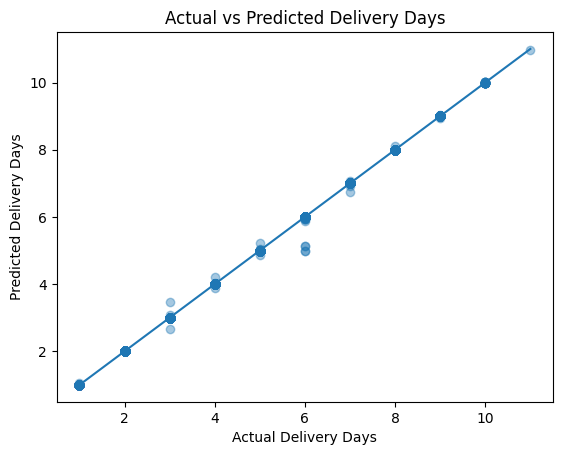

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Delivery Days")
plt.ylabel("Predicted Delivery Days")
plt.title("Actual vs Predicted Delivery Days")
plt.show()


In [ ]:
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

comparison_df.head(10)


,Actual,Predicted
0,7,7.0
1,6,6.0
2,4,4.0
3,7,7.0
4,8,8.0
5,4,4.0
6,4,4.0
7,6,6.0
8,7,7.0
9,7,7.0
